In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [21]:
def load_grayscale(path):
    img = cv2.imread(path)
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return img

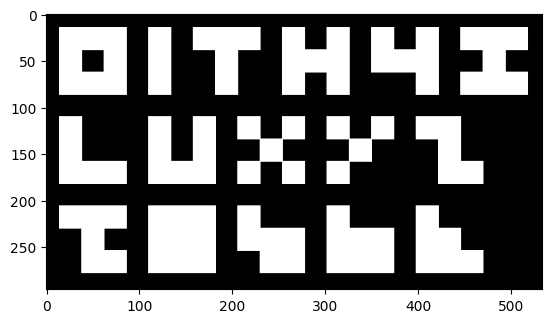

In [22]:
#Chargement Image

image = load_grayscale("image1.png")

plt.imshow(image, cmap='gray')

In [23]:
# Erosion

S = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]], np.uint8)

def ultimate_erosion(img, kernel):
    final_img = np.zeros(img.shape)
    cur_frame = img

    while np.sum(cur_frame) != 0:
        eroded_frame = cv2.erode(cur_frame, kernel)
        dilated_frame = cv2.dilate(eroded_frame, kernel)
        final_img += cur_frame - dilated_frame

        cur_frame = eroded_frame
    
    return final_img

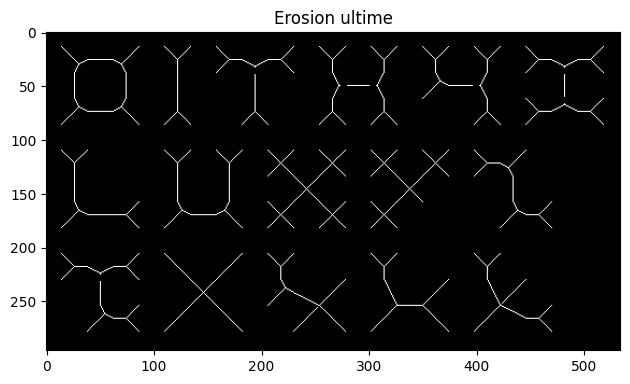

In [24]:
# Erosion Ultime

ultimate_base = ultimate_erosion(image, S)
plt.imshow(ultimate_base, cmap= 'gray')
plt.title("Erosion ultime")
plt.tight_layout()
plt.show()

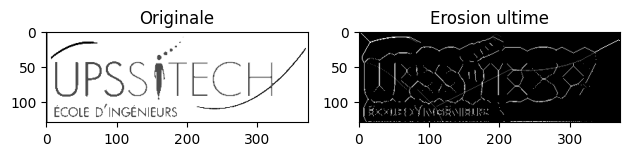

In [25]:
image = load_grayscale("Upssitech.png")

ultimate_ups = ultimate_erosion(image, S)
plt.subplot(1, 2, 1)
plt.imshow(load_grayscale("Upssitech.png"), cmap= 'gray')
plt.title("Originale")
plt.subplot(1, 2, 2)
plt.imshow(ultimate_ups, cmap= 'gray')
plt.title("Erosion ultime")
plt.tight_layout()
plt.show()

In [26]:
def detect_leafs_and_nodes(img, marker_size):
    leafs = np.zeros(img.shape)
    nodes = np.zeros(img.shape)
    s = marker_size // 2

    for y in range(1, img.shape[0]-1):
        for x in range(1, img.shape[1]-1):
            if img[y, x] == 0:
                continue

            neighbors = img[y-1:y+2, x-1:x+2]
            num_neighbors = np.sum(neighbors) / 255 - 1

            if num_neighbors == 1:
                leafs[y-s:y+s+1, x-s:x+s+1] = 255
            
            if num_neighbors >= 3:
                nodes[y-s:y+s+1, x-s:x+s+1] = 255
    
    return leafs, nodes


def combine_images(img, leafs, nodes, leaf_color=(0, 1, 0), node_color=(1, 1, 0)):
    def to_rgb(im, pattern) -> tuple:
        vals = ( im if val == 1 else np.zeros(im.shape) for val in pattern)
        return np.dstack(tuple(vals))

    img_rgb = to_rgb(img, (1, 1, 1))
    leafs_rgb = to_rgb(leafs, leaf_color)
    nodes_rgb = to_rgb(nodes, node_color)
    
    out = img_rgb + leafs_rgb + nodes_rgb
    return out.astype(np.uint8)

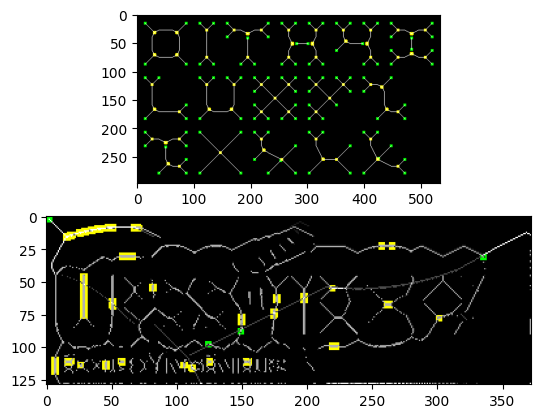

In [28]:
leafs, nodes = detect_leafs_and_nodes(ultimate_base, 5)
final_img_1 = combine_images(ultimate_base, leafs, nodes, leaf_color=(0, 1, 0), node_color=(1, 1, 0))

leafs, nodes = detect_leafs_and_nodes(ultimate_ups, 5)
final_img_2 = combine_images(ultimate_ups, leafs, nodes, leaf_color=(0, 1, 0), node_color=(1, 1, 0))


plt.subplot(2,1,1)
plt.imshow(final_img_1)
plt.subplot(2,1,2)
plt.imshow(final_img_2)
plt.show()